In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


## One Condition HDDM

#### Load the data and and check data

In [3]:
# Load data from csv file into a NumPy structured array
dataAll = hddm.load_csv('./rt_dataframes/all.csv')
dataAll.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [5]:
dataAll = dataAll.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAll.head(10)


,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


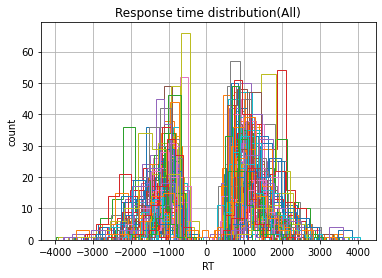

In [6]:
#flip the error RTs to be negative
dataAll = hddm.utils.flip_errors(dataAll)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(All)')
for i, subj_data in dataAll.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(All).png')

## Fitting the hierarchical model for one condition with no subject effects

In [20]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(dataAll, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(2000, burn=500, dbname='traces(1c).db', db='pickle')
m.save('./fitting_results/HDDM/HDDM1C/HDDM1C(noEffects)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/an

 [-                 3%                  ] 68 of 2000 complete in 90.4 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t


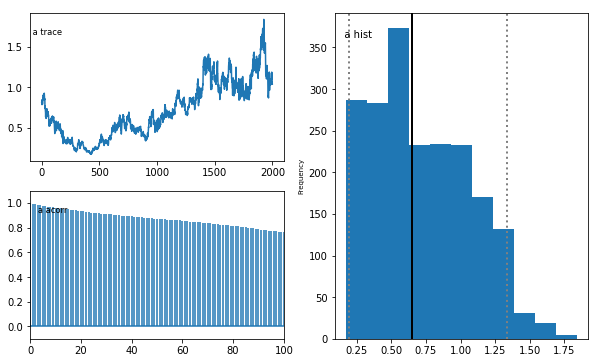

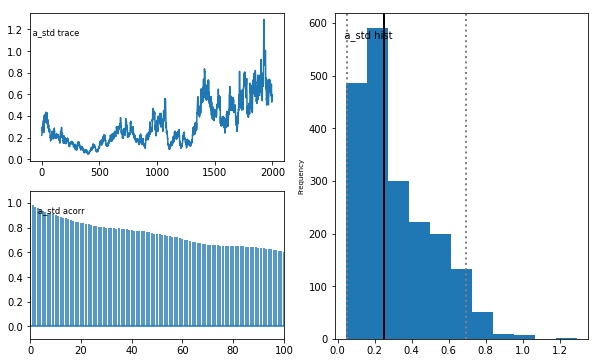

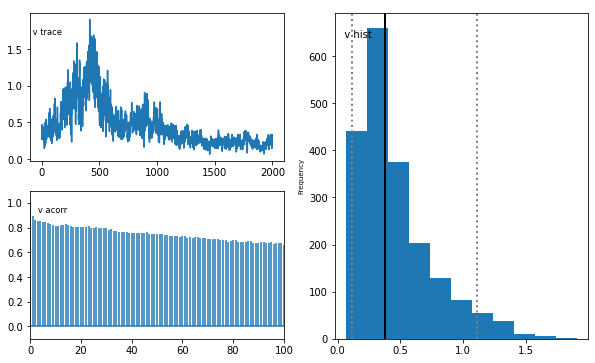

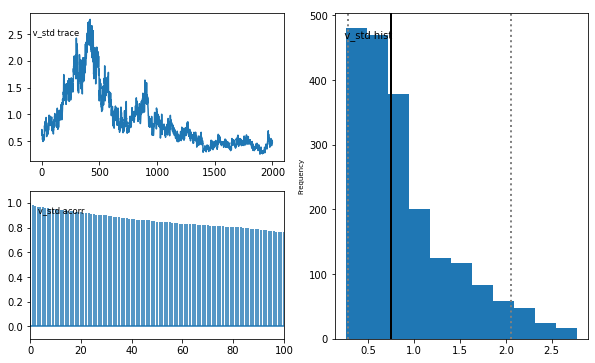

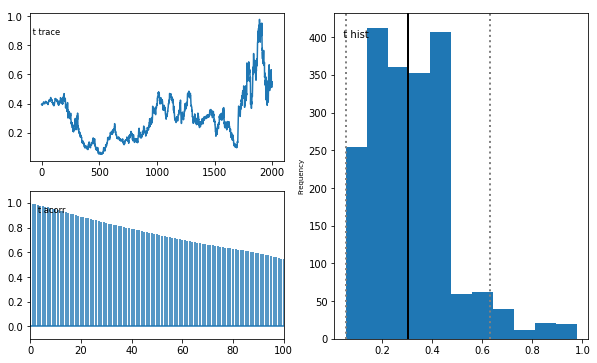

In [19]:
#plot all 4000 posterior samples
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std'])

In [17]:
stats1C = m.gen_stats()
stats1C[stats1C.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,0.716317,0.349004,0.213608,0.439871,0.651608,0.986999,1.40203,0.0344998
a_std,0.317762,0.19669,0.0757461,0.162013,0.251697,0.449542,0.74806,0.0190653
v,0.46263,0.293841,0.145806,0.245823,0.374215,0.586284,1.26771,0.0270868
v_std,0.893572,0.523546,0.328599,0.489403,0.745061,1.12572,2.25547,0.0513552
t,0.313,0.165024,0.0798521,0.180348,0.300866,0.407945,0.729331,0.0162191
t_std,0.286606,0.430822,0.0278699,0.0722442,0.11202,0.230531,1.5488,0.0426306


Plotting a
Plotting a_std
Plotting v
Plotting t


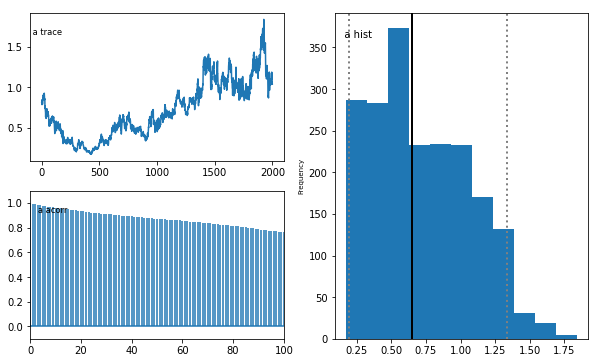

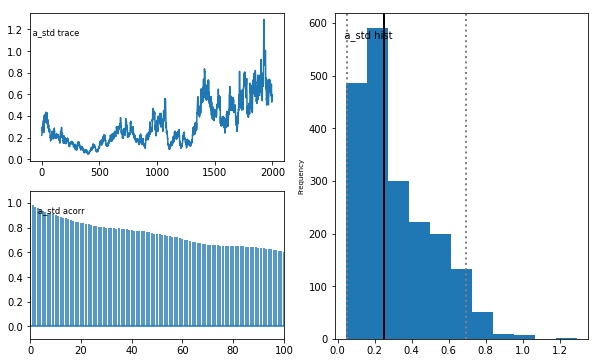

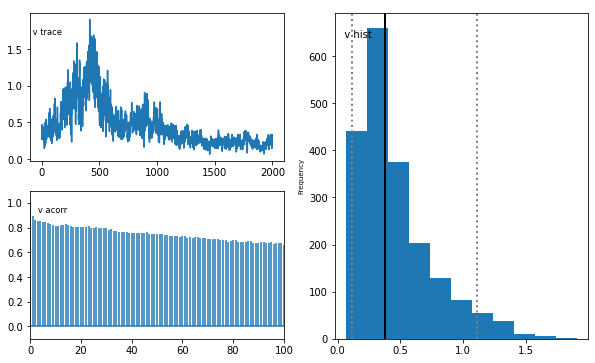

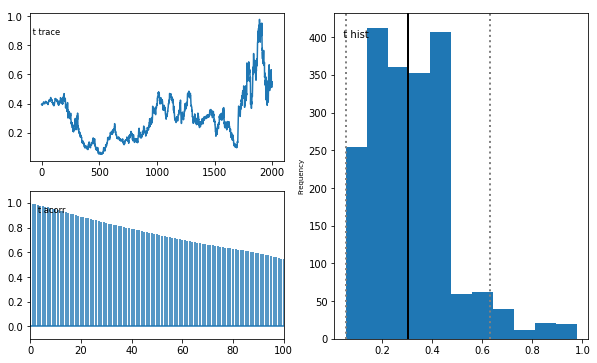

In [59]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])

## Check for Model convergence

In [23]:
# Set up models list to append results
models = list()

In [24]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(2000, burn=500, dbname = f'chain_{chain_num}', db='pickle')
    print(f'Finished chain {chain_num}')
    return m

In [25]:
num_chains = 5
data_chains = [(dataAll,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)

for i, model in enumerate(models):
    model.save(f'./fitting_results/HDDM1C/chain_{i}')
print('Finished all chains')



Fitting chain 1Fitting chain 0
Fitting chain 2

Fitting chain 3


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/an

 -----------------47%                  ] 942 of 2000 complete in 1451.9 sec               0%                  ] 2 of 2000 complete in 1.0 sec[                  0%                  ] 2 of 2000 complete in 1.0 sec[                  0%                  ] 2 of 2000 complete in 1.0 sec[                  0%                  ] 3 of 2000 complete in 2.0 sec[                  0%                  ] 3 of 2000 complete in 2.0 sec[                  0%                  ] 3 of 2000 complete in 2.1 sec[                  0%                  ] 3 of 2000 complete in 2.1 sec[                  0%                  ] 4 of 2000 complete in 3.0 sec[                  0%                  ] 4 of 2000 complete in 3.0 sec[                  0%                  ] 4 of 2000 complete in 3.1 sec[                  0%                  ] 4 of 2000 complete in 3.2 sec[                  0%                  ] 5 of 2000 complete in 4.0 sec[                  0%                  ] 5 of 2000 complete in 4.1 sec[                  

In [28]:
#check for model loading
models

In [29]:
# check model convergence
results = hddm.analyze.gelman_rubin(models)
print(results)

{'a': 1.3923676356193415, 'a_std': 1.2661124524961271, 'a_subj.00aa64fdcb675341': 1.2191115917259152, 'a_subj.02535fcf7e16bb56': 1.1701325592583853, 'a_subj.06c46b112368babf': 1.1967714859715246, 'a_subj.09ba82a2ca814481': 1.2602811198695039, 'a_subj.0abfc32a4d12c731': 1.170674682104837, 'a_subj.0b0a94c202d0b233': 1.191136123985432, 'a_subj.0beac20378edac7b': 1.1464444204011233, 'a_subj.0d894551bc966608': 1.1853562126350616, 'a_subj.10d15198ac61a404': 1.141818353821687, 'a_subj.12a096342c4d052f': 1.169621530361218, 'a_subj.13e347e32a454872': 1.1656650362143886, 'a_subj.15e0c065b2c11595': 1.1509747172840212, 'a_subj.163b12703c8e5c3c': 1.1664311919184898, 'a_subj.1bf86ff948486447': 1.1510247929576447, 'a_subj.1cb976bac3a2016b': 1.153182449082265, 'a_subj.1ffdcfc59b83c43a': 1.1570684575521726, 'a_subj.221e9f16c114b2c0': 1.1981450159428195, 'a_subj.22d84796012679e8': 1.2938272267291506, 'a_subj.247384e4eccc4f80': 1.1798543623443385, 'a_subj.2737c4b829b3018f': 1.1602368823323486, 'a_subj.27